# Import

In [1]:
# basic
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# h2o
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [45]:
# Sci-kit learn
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import auc, roc_curve, classification_report, accuracy_score, mean_absolute_error

In [ ]:
# Torch
import torch
import torch.nn as nn
import torch.nn.utils as utils
import torch.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Data Processing


In [2]:
ad_data = pd.read_csv('ad_table.csv')
ad_data

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1
...,...,...,...,...,...,...,...
2110,11/18/15,78111,1326,37,1.01,553.36,ad_group_40
2111,11/19/15,79857,1413,34,1.00,840.72,ad_group_40
2112,11/20/15,75695,1332,35,1.09,468.95,ad_group_40
2113,11/21/15,73761,1336,36,1.11,437.03,ad_group_40


In [4]:
ad_data.dtypes

date                   object
shown                   int64
clicked                 int64
converted               int64
avg_cost_per_click    float64
total_revenue         float64
ad                     object
dtype: object

In [5]:
ad_data['date'] = pd.to_datetime(ad_data['date'])

In [6]:
ad_data.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


In [7]:
ad_data.isnull().any()

date                  False
shown                 False
clicked               False
converted             False
avg_cost_per_click    False
total_revenue         False
ad                    False
dtype: bool

In [8]:
ad_data['profit'] = ad_data['total_revenue'] - ad_data['avg_cost_per_click'] * ad_data['clicked']

In [11]:
ad_data

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,-1816.55
...,...,...,...,...,...,...,...,...
2110,2015-11-18,78111,1326,37,1.01,553.36,ad_group_40,-785.90
2111,2015-11-19,79857,1413,34,1.00,840.72,ad_group_40,-572.28
2112,2015-11-20,75695,1332,35,1.09,468.95,ad_group_40,-982.93
2113,2015-11-21,73761,1336,36,1.11,437.03,ad_group_40,-1045.93


In [30]:
ad_data['date'].max()

Timestamp('2015-11-22 00:00:00')

# Question 1 - Top 5 best ad groups

In [18]:
# criterion 1 - profit
profit_group = ad_data.groupby('ad').apply(lambda x: x['profit'].sum() / x['shown'].sum()).sort_values(ascending=False).reset_index()
profit_group

,ad,0
0,ad_group_16,0.020516
1,ad_group_2,0.020116
2,ad_group_14,0.016485
3,ad_group_31,0.005824
4,ad_group_27,0.000725
5,ad_group_9,-0.000069
6,ad_group_36,-0.000560
7,ad_group_17,-0.002144
8,ad_group_15,-0.002293
9,ad_group_25,-0.002576


In [20]:
print(list(profit_group['ad'][:5]))

['ad_group_16', 'ad_group_2', 'ad_group_14', 'ad_group_31', 'ad_group_27']


In [21]:
# criterion 2 - average click-through rate
click_group = ad_data.groupby('ad').apply(lambda x: x['clicked'].sum() / x['shown'].sum()).sort_values(ascending=False).reset_index()
click_group

,ad,0
0,ad_group_18,0.098959
1,ad_group_3,0.094969
2,ad_group_19,0.094144
3,ad_group_26,0.090987
4,ad_group_28,0.089046
5,ad_group_32,0.087934
6,ad_group_7,0.087299
7,ad_group_13,0.085699
8,ad_group_34,0.084225
9,ad_group_4,0.082882


In [22]:
print(list(click_group['ad'][:5]))

['ad_group_18', 'ad_group_3', 'ad_group_19', 'ad_group_26', 'ad_group_28']


group 31 and 27 are making the top 5 profits but in the lowest 5 CTRs.

In [23]:
# Criterion 3 - Conversion Rate
convert_group = ad_data.groupby('ad').apply(lambda x: x['converted'].sum() / x['shown'].sum()).sort_values(ascending=False).reset_index()
convert_group

,ad,0
0,ad_group_13,0.008102
1,ad_group_34,0.007360
2,ad_group_18,0.006913
3,ad_group_12,0.005468
4,ad_group_4,0.005210
5,ad_group_26,0.004553
6,ad_group_37,0.004299
7,ad_group_5,0.004113
8,ad_group_11,0.002959
9,ad_group_20,0.002848


In [24]:
print(list(convert_group['ad'][:5]))

['ad_group_13', 'ad_group_34', 'ad_group_18', 'ad_group_12', 'ad_group_4']


# Question 2

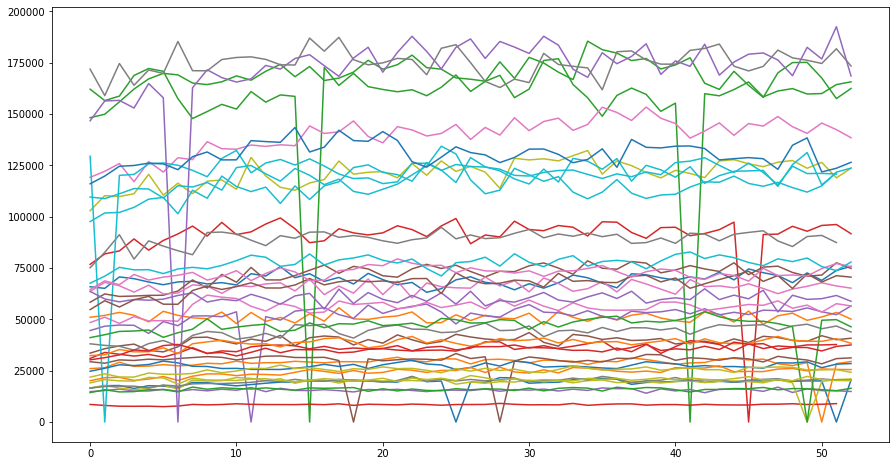

In [29]:
plt.figure(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = ad_data[ad_data['ad'] == ad_group].sort_values(by='date')['shown'].values
    plt.plot(vals)
plt.show()

In [41]:
group_15 = ad_data[ad_data['ad'] == 'ad_group_15']
X = group_15[['date']].values
y = group_15[['shown']].values
print(X, y)

[['2015-10-01T00:00:00.000000000']
 ['2015-10-02T00:00:00.000000000']
 ['2015-10-03T00:00:00.000000000']
 ['2015-10-04T00:00:00.000000000']
 ['2015-10-05T00:00:00.000000000']
 ['2015-10-06T00:00:00.000000000']
 ['2015-10-07T00:00:00.000000000']
 ['2015-10-08T00:00:00.000000000']
 ['2015-10-09T00:00:00.000000000']
 ['2015-10-10T00:00:00.000000000']
 ['2015-10-11T00:00:00.000000000']
 ['2015-10-12T00:00:00.000000000']
 ['2015-10-13T00:00:00.000000000']
 ['2015-10-14T00:00:00.000000000']
 ['2015-10-15T00:00:00.000000000']
 ['2015-10-16T00:00:00.000000000']
 ['2015-10-17T00:00:00.000000000']
 ['2015-10-18T00:00:00.000000000']
 ['2015-10-19T00:00:00.000000000']
 ['2015-10-20T00:00:00.000000000']
 ['2015-10-21T00:00:00.000000000']
 ['2015-10-22T00:00:00.000000000']
 ['2015-10-23T00:00:00.000000000']
 ['2015-10-24T00:00:00.000000000']
 ['2015-10-25T00:00:00.000000000']
 ['2015-10-26T00:00:00.000000000']
 ['2015-10-27T00:00:00.000000000']
 ['2015-10-28T00:00:00.000000000']
 ['2015-10-29T00:00:

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = lr.predict(X.astype(float))
print(mean_absolute_error(y, y_pred))

502.20772060501514


In [52]:
X_test = pd.DataFrame({'date': [pd.to_datetime('2015-12-15', format='%Y-%m-%d')]})
y_pred = lr.predict(X_test.values.astype(float))
print(y_pred[0][0])

15595.440735365266


In [57]:
# add more features
group_15 = ad_data[ad_data['ad'] == 'ad_group_15']
group_15['days'] = group_15.date.map(lambda dt: (dt - ad_data.date.min()).days)
group_15['weekday'] = group_15.date.map(lambda dt: dt.day_name())
group_15 = pd.get_dummies(group_15,columns=['weekday'],prefix='',prefix_sep='')
group_15

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,profit,days,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
740,2015-10-01,14811,326,16,0.81,265.25,ad_group_15,1.19,0,0,0,0,0,1,0,0
741,2015-10-02,15326,346,18,0.85,242.75,ad_group_15,-51.35,1,1,0,0,0,0,0,0
742,2015-10-03,16063,282,16,0.67,147.46,ad_group_15,-41.48,2,0,0,1,0,0,0,0
743,2015-10-04,15156,304,16,0.64,320.00,ad_group_15,125.44,3,0,0,0,1,0,0,0
744,2015-10-05,15088,322,12,0.78,68.32,ad_group_15,-182.84,4,0,1,0,0,0,0,0
745,2015-10-06,15920,337,15,0.76,215.92,ad_group_15,-40.20,5,0,0,0,0,0,1,0
746,2015-10-07,14981,341,16,0.78,223.02,ad_group_15,-42.96,6,0,0,0,0,0,0,1
747,2015-10-08,15805,317,16,0.73,227.14,ad_group_15,-4.27,7,0,0,0,0,1,0,0
748,2015-10-09,15201,385,15,0.85,358.27,ad_group_15,31.02,8,1,0,0,0,0,0,0
749,2015-10-10,15970,431,18,0.86,242.08,ad_group_15,-128.58,9,0,0,1,0,0,0,0


In [58]:
time_features = ['days', 'Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Sunday']
X_2 = group_15[time_features]
y_2 = group_15.shown
lr = LinearRegression()
lr.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# slightly better
y_pred_2 = lr.predict(X_2)
print(mean_absolute_error(y_2, y_pred_2))

489.5760706798444


In [65]:
test_data = {d: [0] for d in ['days', 'Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Sunday']}
test_data['Tuesday'] = [1]
test_data['days'] = [(pd.to_datetime('2015-12-15', format='%Y-%m-%d') - ad_data.date.min()).days]
X_test = pd.DataFrame(test_data)
# X_test['date'] = X_test['date'].astype(float)
y_pred = lr.predict(X_test.values)
print(y_pred[0])

15782.920634920636


# Question 3

Not easy to tell the trend visually

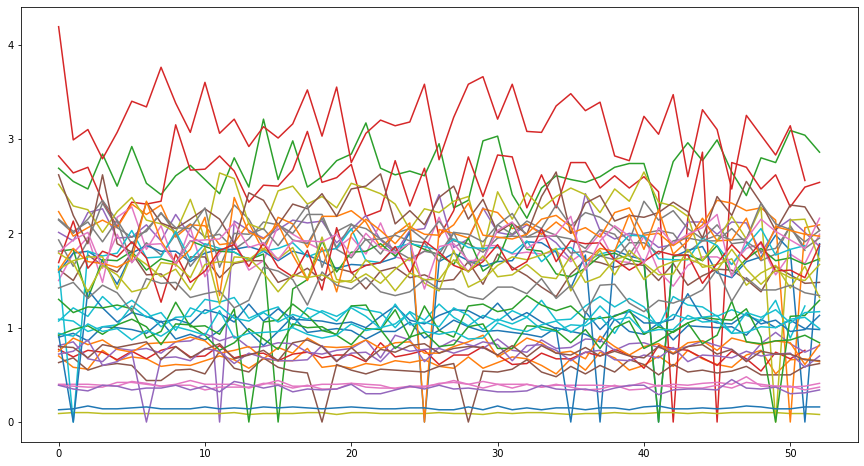

In [66]:
plt.figure(figsize=(15, 8))
for i in range(1, 41):
    ad_group = 'ad_group_' + str(i)
    vals = ad_data[ad_data['ad'] == ad_group].sort_values(by='date')['avg_cost_per_click'].values
    plt.plot(vals)
plt.show()

Check p-value (check significance) and slope

In [77]:
import statsmodels.api as sm
group_15 = ad_data[ad_data['ad'] == 'ad_group_15']
group_15['days'] = group_15.date.map(lambda dt: (dt - ad_data.date.min()).days)
X = group_15['days'].values
y = group_15['avg_cost_per_click'].values

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = float(fii.summary2().tables[1]['P>|t|'])
slope = float(lr.coef_)
print(p_values, slope)
if p_values < 0.05:
  if slope > 0:
    print('up')
  else:
    print('down')
else:
  print('flat')

5.3129075319063976e-17 0.0004055797452023866
up
